In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
data3 = pd.read_csv('jobposting sample.csv')

data analysis

In [3]:
# List of column names
columns = ['标题', '标题链接', '地区', '省/城市', '地级城市', '工作经验', '工作经验_float', '学历', '学历_int', '公司名称', '公司性质', '公司规模', '行业领域_第一段', '国民经济行业分类', '薪资', '薪资下区间', '薪资上区间', '薪资单位', '职能中类', '职能大类', '发布时间', '年份', '采集时的时间', '职位信息', '分词']

# Total number of rows
total_count = len(data3)

# Create a summary dictionary
summary_dict = {
    '列名': columns,
    '空值数': [data3[col].isnull().sum() for col in columns],
    '空值百分比': [data3[col].isnull().sum() / total_count * 100 for col in columns]
}

# Create a new DataFrame
summary_df = pd.DataFrame(summary_dict)

# Display results
print(summary_df)
df1 = summary_df

            列名  空值数      空值百分比
0           标题    0   0.000000
1         标题链接    0   0.000000
2           地区   59  13.947991
3         省/城市   59  13.947991
4         地级城市   59  13.947991
5         工作经验   53  12.529551
6   工作经验_float   53  12.529551
7           学历   37   8.747045
8       学历_int   37   8.747045
9         公司名称    0   0.000000
10        公司性质    0   0.000000
11        公司规模   52  12.293144
12    行业领域_第一段    0   0.000000
13    国民经济行业分类    6   1.418440
14          薪资    0   0.000000
15       薪资下区间    0   0.000000
16       薪资上区间    0   0.000000
17        薪资单位    0   0.000000
18        职能中类    0   0.000000
19        职能大类    0   0.000000
20        发布时间    0   0.000000
21          年份    0   0.000000
22      采集时的时间  335  79.196217
23        职位信息    0   0.000000
24          分词    0   0.000000


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

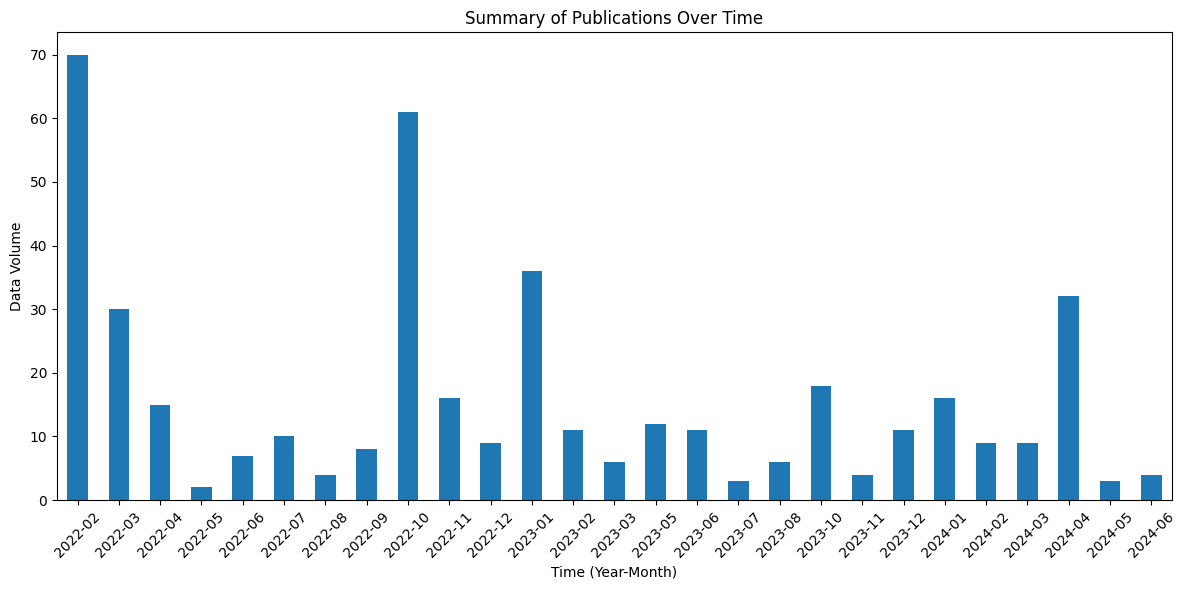

In [4]:
data = data3
data['发布时间'] = data['发布时间'].str.replace('发布', '')

# Define a function to merge 'Release Time' and 'Year' columns into a new date column
def combine_date(row):
    year = row['年份']
    month_day = row['发布时间']
    # Concatenate year and month-day and convert to datetime format
    return pd.to_datetime(f"{year}-{month_day}", format="%Y-%m-%d", errors='coerce')

# Apply the function to create a new 'Publication Date' column
data['发布日期'] = data.apply(combine_date, axis=1)

# Create a new column containing only Year-Month
data['年-月'] = data['发布日期'].dt.to_period('M')

# Remove null values to ensure data integrity
data = data.dropna(subset=['发布日期'])

# Plot histogram
plt.figure(figsize=(12, 6))
data['年-月'].value_counts().sort_index().plot(kind='bar')
plt.title('Summary of Publications Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Data Volume')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the figure
#plt.show()
df2 = plt
df2

In [5]:
data = data3
# Get unique values of prefecture-level cities
cities = data['地级城市'].unique()

# Calculate counts for missing and available detailed job information
no_depth_info = data[data['职位信息'].isnull()].groupby('地级城市').size()
with_depth_info = data[data['职位信息'].notnull()].groupby('地级城市').size()

# Calculate unique values for all linked groups
unique_links = data.groupby('地级城市')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '地级城市': cities,
    '无深度信息': no_depth_info.reindex(cities, fill_value=0),
    '有深度信息': with_depth_info.reindex(cities, fill_value=0),
    '全部链接组': unique_links.reindex(cities, fill_value=0)
})

# Calculate percentage values
summary_table['无深度信息百分比'] = (summary_table['无深度信息'] / sum(summary_table['无深度信息'])) * 100
summary_table['有深度信息百分比'] = (summary_table['有深度信息'] / sum(summary_table['有深度信息'])) * 100
summary_table['全部链接组占总数百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Compute total count and sort
summary_table['总数'] = summary_table['无深度信息'] + summary_table['有深度信息']
summary_table = summary_table.sort_values(by='总数', ascending=False).head(10)

# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df3 = summary_table

  地级城市  无深度信息  有深度信息  全部链接组  无深度信息百分比   有深度信息百分比  全部链接组占总数百分比   总数
0   上海      0    158    154       NaN  43.406593    36.406619  158
1   深圳      0     54     54       NaN  14.835165    12.765957   54
2   杭州      0     35     35       NaN   9.615385     8.274232   35
3   北京      0     31     29       NaN   8.516484     6.855792   31
4   广州      0     22     22       NaN   6.043956     5.200946   22
5   南京      0     14     14       NaN   3.846154     3.309693   14
6   成都      0      9      9       NaN   2.472527     2.127660    9
7   重庆      0      7      7       NaN   1.923077     1.654846    7
8   西安      0      6      6       NaN   1.648352     1.418440    6
9   青岛      0      5      5       NaN   1.373626     1.182033    5


In [6]:
data = data3
# Unique values of National Economic Industry Classification
inds = data['国民经济行业分类'].unique()

# Calculate counts for missing and available detailed job information
no_depth_info = data[data['职位信息'].isnull()].groupby('国民经济行业分类').size()
with_depth_info = data[data['职位信息'].notnull()].groupby('国民经济行业分类').size()

# Calculate unique values for all linked groups
unique_links = data.groupby('国民经济行业分类')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '国民经济行业分类': inds,
    '无深度信息': no_depth_info.reindex(inds, fill_value=0),
    '有深度信息': with_depth_info.reindex(inds, fill_value=0),
    '全部链接组': unique_links.reindex(inds, fill_value=0)
})

# Calculate percentage values
summary_table['无深度信息百分比'] = (summary_table['无深度信息'] / sum(summary_table['无深度信息'])) * 100
summary_table['有深度信息百分比'] = (summary_table['有深度信息'] / sum(summary_table['有深度信息'])) * 100
summary_table['全部链接组占总数百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Compute total count and sort
summary_table['总数'] = summary_table['无深度信息'] + summary_table['有深度信息']
summary_table.dropna(subset=['国民经济行业分类'], inplace=True)

# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df4 = summary_table

           国民经济行业分类  无深度信息  有深度信息  全部链接组  无深度信息百分比   有深度信息百分比  全部链接组占总数百分比  \
0               金融业      0    304    298       NaN  72.901679    70.449173   
1   信息传输、软件和信息技术服务业      0     56     56       NaN  13.429257    13.238771   
2              房地产业      0      1      1       NaN   0.239808     0.236407   
3           卫生和社会工作      0      2      2       NaN   0.479616     0.472813   
4                综合      0     15     15       NaN   3.597122     3.546099   
5        科学研究和技术服务业      0     14     13       NaN   3.357314     3.073286   
6             商务服务业      0     12     12       NaN   2.877698     2.836879   
7            批发和零售业      0      3      3       NaN   0.719424     0.709220   
8               制造业      0      4      4       NaN   0.959233     0.945626   
9               采矿业      0      1      1       NaN   0.239808     0.236407   
10       环境和公共设施管理业      0      4      4       NaN   0.959233     0.945626   
11      交通运输、仓储和邮政业      0      1      1       NaN   0.239808   

In [7]:
data = data3
# Unique values of Company Size
sizes = data['公司规模'].unique()

# Calculate counts for missing and available detailed job information
no_depth_info = data[data['职位信息'].isnull()].groupby('公司规模').size()
with_depth_info = data[data['职位信息'].notnull()].groupby('公司规模').size()

# Calculate unique values for all linked groups
unique_links = data.groupby('公司规模')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '公司规模': sizes,
    '无深度信息': no_depth_info.reindex(sizes, fill_value=0),
    '有深度信息': with_depth_info.reindex(sizes, fill_value=0),
    '全部链接组': unique_links.reindex(sizes, fill_value=0)
})

# Calculate percentage values
summary_table['无深度信息百分比'] = (summary_table['无深度信息'] / sum(summary_table['无深度信息'])) * 100
summary_table['有深度信息百分比'] = (summary_table['有深度信息'] / sum(summary_table['有深度信息'])) * 100
summary_table['全部链接组占总数百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Compute total count and sort
summary_table['总数'] = summary_table['无深度信息'] + summary_table['有深度信息']
summary_table.dropna(subset=['公司规模'], inplace=True)
summary_table = summary_table.sort_values(by='总数', ascending=False).head(7)

# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df5 = summary_table

          公司规模  无深度信息  有深度信息  全部链接组  无深度信息百分比   有深度信息百分比  全部链接组占总数百分比   总数
0        少于50人      0    124    122       NaN  33.423181    28.841608  124
1      50-150人      0     77     77       NaN  20.754717    18.203310   77
2     150-500人      0     75     75       NaN  20.215633    17.730496   75
3   1000-5000人      0     53     52       NaN  14.285714    12.293144   53
4    500-1000人      0     24     24       NaN   6.469003     5.673759   24
5     10000人以上      0     10     10       NaN   2.695418     2.364066   10
6  5000-10000人      0      8      8       NaN   2.156334     1.891253    8


In [8]:
data = data3
# Unique values of Work Experience (float)
exps = data['工作经验_float'].unique()

# Calculate counts for missing and available detailed job information
no_depth_info = data[data['职位信息'].isnull()].groupby('工作经验_float').size()
with_depth_info = data[data['职位信息'].notnull()].groupby('工作经验_float').size()

# Calculate unique values for all linked groups
unique_links = data.groupby('工作经验_float')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '工作经验_float': exps,
    '无深度信息': no_depth_info.reindex(exps, fill_value=0),
    '有深度信息': with_depth_info.reindex(exps, fill_value=0),
    '全部链接组': unique_links.reindex(exps, fill_value=0)
})

# Calculate percentage values
summary_table['无深度信息百分比'] = (summary_table['无深度信息'] / sum(summary_table['无深度信息'])) * 100
summary_table['有深度信息百分比'] = (summary_table['有深度信息'] / sum(summary_table['有深度信息'])) * 100
summary_table['全部链接组占总数百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Compute total count and sort
summary_table['总数'] = summary_table['无深度信息'] + summary_table['有深度信息']
summary_table.dropna(subset=['工作经验_float'], inplace=True)
summary_table = summary_table.sort_values(by='总数', ascending=False)

# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df6 = summary_table


   工作经验_float  无深度信息  有深度信息  全部链接组  无深度信息百分比   有深度信息百分比  全部链接组占总数百分比   总数
0         0.0      0    123    119       NaN  33.243243    28.132388  123
1         2.0      0     83     80       NaN  22.432432    18.912530   83
2         1.0      0     75     75       NaN  20.270270    17.730496   75
3         3.5      0     59     59       NaN  15.945946    13.947991   59
4         6.0      0     24     24       NaN   6.486486     5.673759   24
5         3.0      0      4      4       NaN   1.081081     0.945626    4
6         5.0      0      2      2       NaN   0.540541     0.472813    2


In [9]:
data = data3
# Unique values of Salary Lower Range
wages = data['薪资下区间'].unique()

# Calculate counts for missing and available detailed job information
no_depth_info = data[data['职位信息'].isnull()].groupby('薪资下区间').size()
with_depth_info = data[data['职位信息'].notnull()].groupby('薪资下区间').size()

# Calculate unique values for all linked groups
unique_links = data.groupby('薪资下区间')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '薪资下区间': wages,
    '无深度信息': no_depth_info.reindex(wages, fill_value=0),
    '有深度信息': with_depth_info.reindex(wages, fill_value=0),
    '全部链接组': unique_links.reindex(wages, fill_value=0)
})

# Calculate percentage values
summary_table['无深度信息百分比'] = (summary_table['无深度信息'] / sum(summary_table['无深度信息'])) * 100
summary_table['有深度信息百分比'] = (summary_table['有深度信息'] / sum(summary_table['有深度信息'])) * 100
summary_table['全部链接组占总数百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Compute total count and sort
summary_table['总数'] = summary_table['无深度信息'] + summary_table['有深度信息']
summary_table.dropna(subset=['薪资下区间'], inplace=True)
summary_table = summary_table.sort_values(by='总数', ascending=False).head(10)

# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df7 = summary_table

   薪资下区间  无深度信息  有深度信息  全部链接组  无深度信息百分比   有深度信息百分比  全部链接组占总数百分比  总数
0   15.0      0     95     93       NaN  22.458629    21.985816  95
1   10.0      0     64     64       NaN  15.130024    15.130024  64
2   20.0      0     34     34       NaN   8.037825     8.037825  34
3    8.0      0     29     29       NaN   6.855792     6.855792  29
4   25.0      0     14     14       NaN   3.309693     3.309693  14
5   12.0      0     14     14       NaN   3.309693     3.309693  14
6   33.0      0     14     13       NaN   3.309693     3.073286  14
7    6.0      0     13     13       NaN   3.073286     3.073286  13
8    7.0      0     12     12       NaN   2.836879     2.836879  12
9    3.0      0     11      9       NaN   2.600473     2.127660  11


In [10]:
# Specify the Excel file name
excel_file = 'data analysis.xlsx'

# Create an ExcelWriter object
with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    df1.to_excel(writer, sheet_name='1. Data Quantity Report', index=False)
    #df2.to_excel(writer, sheet_name='2. Summary of Publications Over Time', index=False)
    df3.to_excel(writer, sheet_name='3. Regional Distribution', index=False)
    df4.to_excel(writer, sheet_name='4. Industry Distribution', index=False)
    df5.to_excel(writer, sheet_name='5. Company Size Distribution', index=False)
    df6.to_excel(writer, sheet_name='6. Work Experience Distribution', index=False)
    df7.to_excel(writer, sheet_name='7. Salary Distribution', index=False)

print(f'Successfully saved: {excel_file}')

Successfully saved: data analysis.xlsx


industry & job analysis

In [11]:
data = data3
# Unique values of National Economic Industry Classification
inds2 = data['国民经济行业分类'].unique()

# Calculate counts for available detailed job information
with_depth_info = data[data['职位信息'].notnull()].groupby('国民经济行业分类').size()
salary_info = data[data['职位信息'].notnull()].groupby('国民经济行业分类')['薪资下区间'].mean()
experience_info = data[data['职位信息'].notnull()].groupby('国民经济行业分类')['工作经验_float'].mean()

# Calculate unique values for all linked groups
unique_links = data.groupby('国民经济行业分类')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '国民经济行业分类': inds2,
    '平均薪资': salary_info.reindex(inds2, fill_value=0),
    '平均工作经验': experience_info.reindex(inds2, fill_value=0),
    '总数': with_depth_info.reindex(inds2, fill_value=0),
    '全部链接组': unique_links.reindex(inds2, fill_value=0)
})

# Calculate percentage values
summary_table['全部链接组占总数据百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Sort the data
summary_table = summary_table.sort_values(by='总数', ascending=False).head(10)
# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df1 = summary_table

          国民经济行业分类       平均薪资    平均工作经验   总数  全部链接组  全部链接组占总数据百分比
0              金融业  12.269813  1.573864  304    298     70.449173
1  信息传输、软件和信息技术服务业  16.248475  2.068627   56     56     13.238771
2               综合   9.466667  2.035714   15     15      3.546099
3       科学研究和技术服务业  33.000000  0.000000   14     13      3.073286
4            商务服务业  38.472222  2.750000   12     12      2.836879
5              制造业  13.750000  2.125000    4      4      0.945626
6       环境和公共设施管理业  60.000000  0.000000    4      4      0.945626
7           批发和零售业  16.666667  6.000000    3      3      0.709220
8          卫生和社会工作   7.500000       NaN    2      2      0.472813
9             房地产业  15.000000  1.000000    1      1      0.236407


/var/folders/jr/0m0wy9490ynf5ppbg3ldz7100000gn/T/ipykernel_33507/1128893185.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=job_data, x="国民经济行业分类", order=job_data["国民经济行业分类"].value_counts().index, palette="Blues")


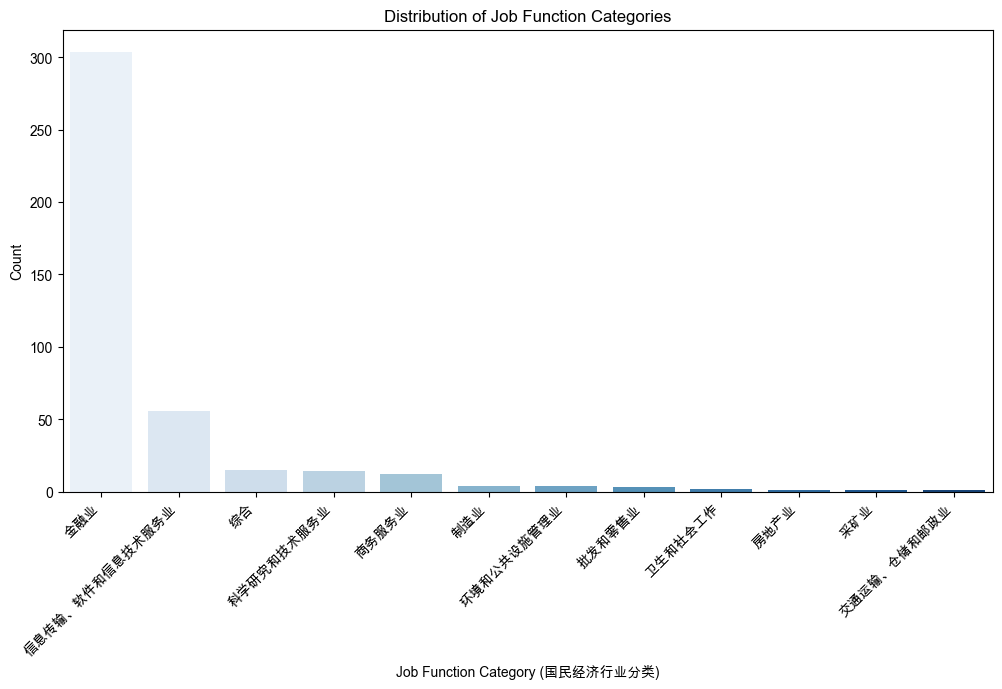

In [12]:
job_data = data3
# Set up font for proper Chinese character display
plt.rcParams['font.family'] = 'Arial Unicode MS'  
plt.rcParams['axes.unicode_minus'] = False  

# Job Category Distribution - Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=job_data, x="国民经济行业分类", order=job_data["国民经济行业分类"].value_counts().index, palette="Blues")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Function Category (国民经济行业分类)")
plt.ylabel("Count")
plt.title("Distribution of Job Function Categories")
plt.show()

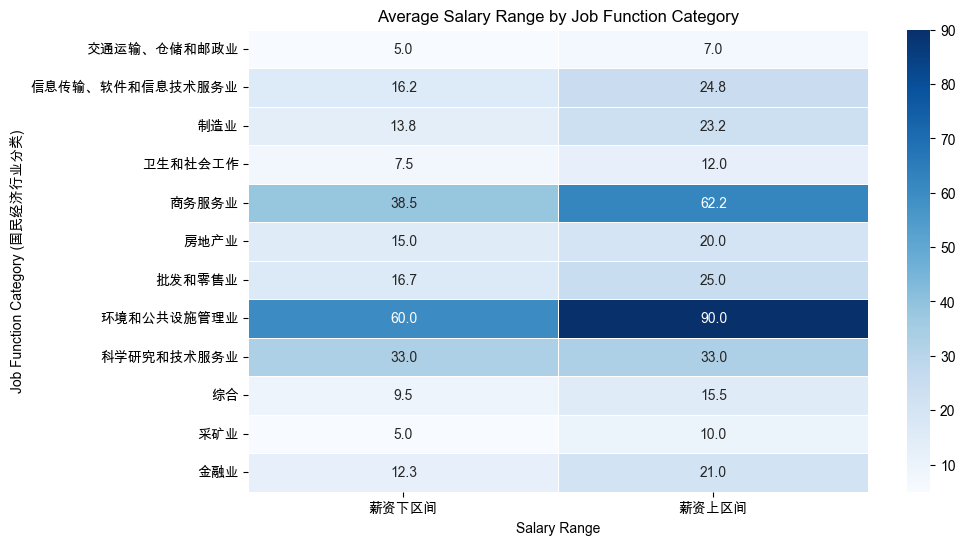

In [13]:
job_data = data3
# Salary Range Heatmap
# Filter valid salary values
salary_data = job_data[["国民经济行业分类", "薪资下区间", "薪资上区间"]].dropna()
salary_data = salary_data.groupby("国民经济行业分类")[["薪资下区间", "薪资上区间"]].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(salary_data, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Salary Range")
plt.ylabel("Job Function Category (国民经济行业分类)")
plt.title("Average Salary Range by Job Function Category")
plt.show()

In [14]:
data = data3
# Unique values of Job Function (Large Category)
largs = data['职能大类'].unique()

# Calculate counts for available detailed job information
with_depth_info = data[data['职位信息'].notnull()].groupby('职能大类').size()
salary_info = data[data['职位信息'].notnull()].groupby('职能大类')['薪资下区间'].mean()
experience_info = data[data['职位信息'].notnull()].groupby('职能大类')['工作经验_float'].mean()

# Calculate unique values for all linked groups
unique_links = data.groupby('职能大类')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '职能大类': largs,
    '平均薪资': salary_info.reindex(largs, fill_value=0),
    '平均工作经验': experience_info.reindex(largs, fill_value=0),
    '总数': with_depth_info.reindex(largs, fill_value=0),
    '全部链接组': unique_links.reindex(largs, fill_value=0)
})

# Calculate percentage values
summary_table['全部链接组占总数据百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Sort the data
summary_table = summary_table.sort_values(by='总数', ascending=False).head(10)
# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df2 = summary_table

            职能大类       平均薪资    平均工作经验   总数  全部链接组  全部链接组占总数据百分比
0    会计/金融/银行/保险  15.712898  1.491803  244    242     57.210402
1             金融  11.585220  1.732394  117    116     27.423168
2  计算机/互联网/通信/电子  19.625775  2.865385   26     26      6.146572
3          互联网技术  10.714286  1.916667    7      6      1.418440
4     政府机构/翻译/其他   6.297571  0.285714    7      5      1.182033
5          销售/客服  16.142857  2.375000    7      7      1.654846
6       财务/税务/法务  15.000000  2.000000    3      3      0.709220
7          通信/电子  15.000000  1.000000    2      2      0.472813
8           生产制造  20.000000       NaN    2      2      0.472813
9             产品  15.000000  1.000000    2      2      0.472813


/var/folders/jr/0m0wy9490ynf5ppbg3ldz7100000gn/T/ipykernel_33507/1248696019.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=job_data, x="职能大类", order=job_data["职能大类"].value_counts().index, palette="Blues")


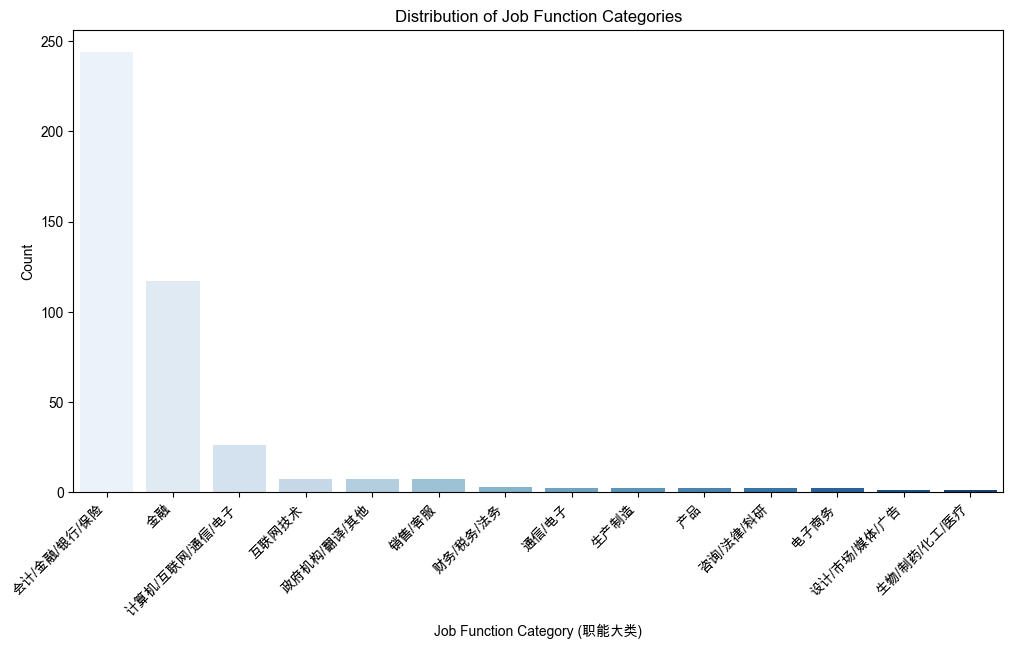

In [15]:
job_data = data3
# Set up font for proper Chinese character display
plt.rcParams['font.family'] = 'Arial Unicode MS'  
plt.rcParams['axes.unicode_minus'] = False  

# Job Category Distribution - Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=job_data, x="职能大类", order=job_data["职能大类"].value_counts().index, palette="Blues")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Function Category (职能大类)")
plt.ylabel("Count")
plt.title("Distribution of Job Function Categories")
plt.show()

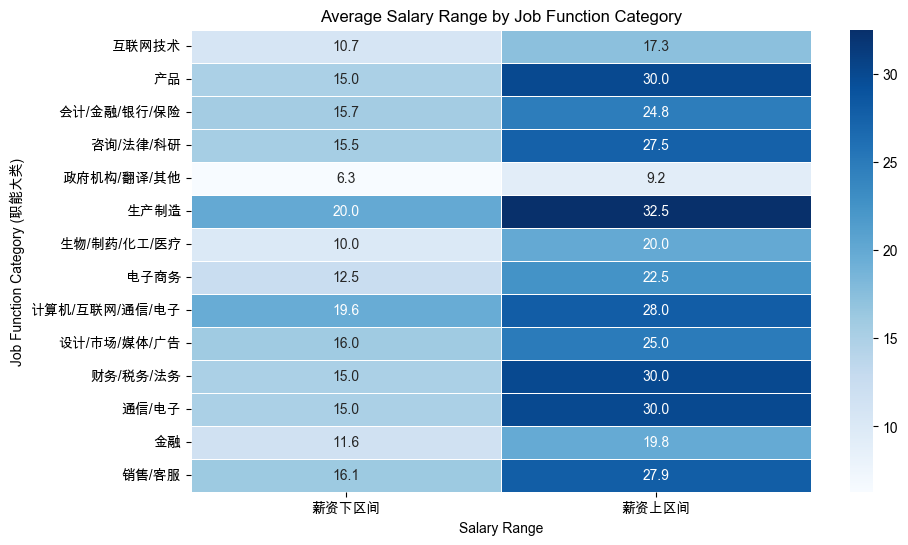

In [16]:
job_data = data3
# Salary Range Heatmap
# Filter valid salary values
salary_data = job_data[["职能大类", "薪资下区间", "薪资上区间"]].dropna()
salary_data = salary_data.groupby("职能大类")[["薪资下区间", "薪资上区间"]].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(salary_data, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Salary Range")
plt.ylabel("Job Function Category (职能大类)")
plt.title("Average Salary Range by Job Function Category")
plt.show()

In [17]:
data = data3
# Unique values of Job Function (Medium Category)
mids = data['职能中类'].unique()

# Calculate counts for available detailed job information
with_depth_info = data[data['职位信息'].notnull()].groupby('职能中类').size()
salary_info = data[data['职位信息'].notnull()].groupby('职能中类')['薪资下区间'].mean()
experience_info = data[data['职位信息'].notnull()].groupby('职能中类')['工作经验_float'].mean()

# Calculate unique values for all linked groups
unique_links = data.groupby('职能中类')['标题链接'].nunique()

# Calculate total count
total_count = len(data)

summary_table = pd.DataFrame({
    '职能中类': mids,
    '平均薪资': salary_info.reindex(mids, fill_value=0),
    '平均工作经验': experience_info.reindex(mids, fill_value=0),
    '总数': with_depth_info.reindex(mids, fill_value=0),
    '全部链接组': unique_links.reindex(mids, fill_value=0)
})

# Calculate percentage values
summary_table['全部链接组占总数据百分比'] = (summary_table['全部链接组'] / total_count) * 100

# Sort the data
summary_table = summary_table.sort_values(by='总数', ascending=False).head(10)
# Reset index
summary_table.reset_index(drop=True, inplace=True)

# Print the table
print(summary_table)
df3 = summary_table


          职能中类       平均薪资    平均工作经验   总数  全部链接组  全部链接组占总数据百分比
0  金融/证券/期货/投资  15.722922  1.481405  242    240     56.737589
1           证券  12.097412  1.640625   59     58     13.711584
2           期货  10.198586  1.500000   30     30      7.092199
3           金融  10.049206  1.000000   16     16      3.782506
4         后端开发  15.466667  3.464286   15     14      3.309693
5          投融资  17.619048  3.142857    7      7      1.654846
6         储备干部   4.847167  0.333333    6      4      0.945626
7           数据   6.837430  0.700000    5      5      1.182033
8      运维/技术支持  46.400000  2.700000    5      5      1.182033
9           运营  11.750000  3.500000    4      4      0.945626


/var/folders/jr/0m0wy9490ynf5ppbg3ldz7100000gn/T/ipykernel_33507/1655639812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=job_data, x="职能中类", order=job_data["职能中类"].value_counts().index, palette="Blues")


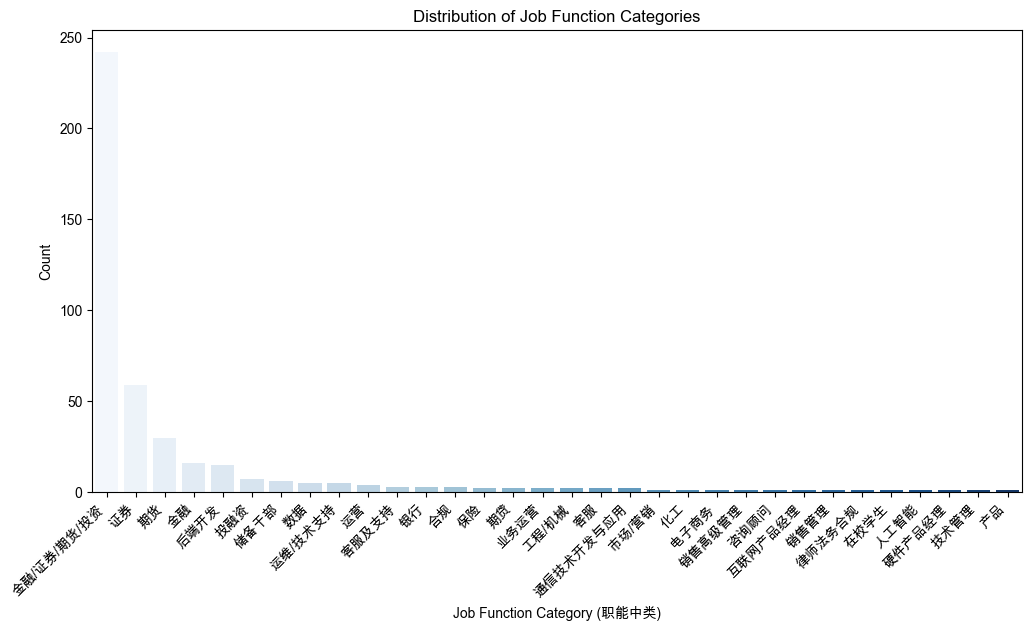

In [18]:
job_data = data3
# Set up font for proper Chinese character display
plt.rcParams['font.family'] = 'Arial Unicode MS'  
plt.rcParams['axes.unicode_minus'] = False  

# Job Category Distribution - Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=job_data, x="职能中类", order=job_data["职能中类"].value_counts().index, palette="Blues")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Function Category (职能中类)")
plt.ylabel("Count")
plt.title("Distribution of Job Function Categories")
plt.show()

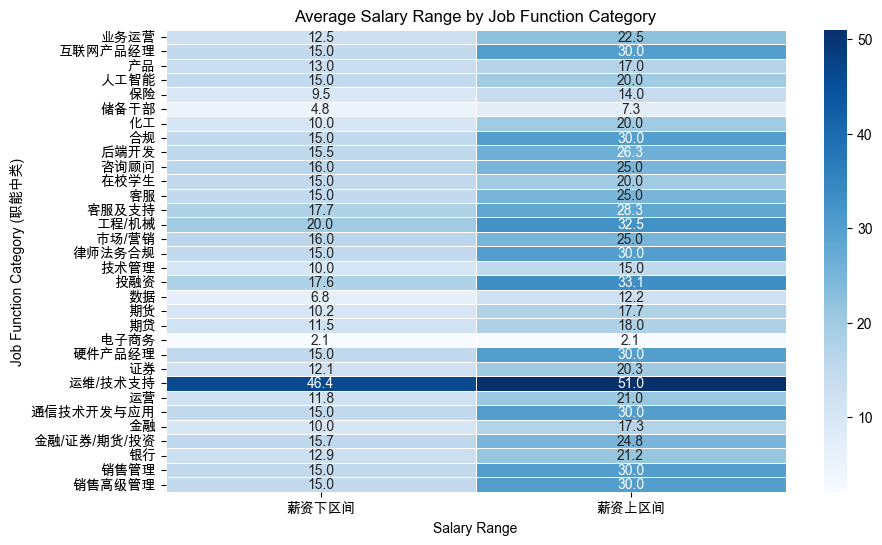

In [19]:
job_data = data3
# Salary Range Heatmap
# Filter valid salary values
salary_data = job_data[["职能中类", "薪资下区间", "薪资上区间"]].dropna()
salary_data = salary_data.groupby("职能中类")[["薪资下区间", "薪资上区间"]].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(salary_data, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Salary Range")
plt.ylabel("Job Function Category (职能中类)")
plt.title("Average Salary Range by Job Function Category")
plt.show()

In [20]:
# Specify the Excel file name
excel_file = 'job analysis.xlsx'

# Create an ExcelWriter object
with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    df1.to_excel(writer, sheet_name='1. Industry Distribution', index=False)
    df2.to_excel(writer, sheet_name='2. Large Category Distribution', index=False)
    df3.to_excel(writer, sheet_name='3. Medium Category Distribution', index=False)

print(f'Successfully saved: {excel_file}')

Successfully saved: job analysis.xlsx
